In [1]:
# Import necessary libraries
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# 1. Métodos Regula-Falsi y Secante

Implementa el método Regula-Falsi tal que, dado un intervalo $[a, b]$ donde $f(a)f(b) < 0$, encuentra una raiz $p \in [a, b]$:

In [2]:
def regula_falsi(f, a, b):
    e = 0.001
    p = a - ((f(a) * (b - a))/ (f(b) - f(a)))
    
    while(f(p) >= e):
        if(np.sign(f(a)) == np.sign(f(p))):
            b = p 
        else:
            a = p
            
        p = a - ((f(a) * (b - a))/ (f(b) - f(a)))
    return p

Implementa el método de la Secante, tal que dados dos números iniciales $p_0$ and $p_1$, devuelve una raiz $p$:

In [3]:
#p_0 es pn
def secant(f, p_0, p_1):
    e = 0.001
    p = p_0 - ((f(p_0) * (p_1 - p_0))/ (f(p_1) - f(p_0)))
    
    while(f(p) >= e):
        p = p_0 - ((f(p_0) * (p_1 - p_0))/ (f(p_1) - f(p_0)))
        
        p_0 = p_1
        p_1 = p
    return p

In [4]:
def secant2(f, p_0, p_1):
    p = p_1 - (f.subs(x, p_1)*(p_0-p_1))/(f.subs(x, p_0)-f.subs(x, p_1))
    while f.subs(x, p) > 0.001:
        p_0 = p
        p = p_1 - (f.subs(x, p_1)*(p_0-p_1))/(f.subs(x, p_0)-f.subs(x, p_1))
    return p

In [5]:
import matplotlib.pyplot as pyplot
import math as mat

def f1(x):
    return 2.3*(x**5) + 2.3*(x**4) + 3.2*x + 3.2

def f2(x):
    return ((mat.e)**(-x)) - mat.log(x)

def f3(x):
    return (mat.log(x)) + x

def f4(x):
    return (mat.log(x)) + (mat.sqrt(x))

def f5(x):
    return ((x-1)**2) - (mat.sqrt(x))

def f6(x):
    return ((mat.e)**x) - (mat.sin(x))

In [6]:
b1 = regula_falsi(f1,-10,10)
print(b1)

b2 = regula_falsi(f2,1,2)
print(b2)

b3 = regula_falsi(f3,0.1,1)
print(b3)

b4 = regula_falsi(f4,0.1,1)
print(b4)

b5 = regula_falsi(f5,1.5,2.5)
print(b5)

b6 = regula_falsi(f6,0.1,2)
print(b6)

-1.0
1.3974104821696123
0.5400220913705173
0.42353885508786726
2.0930526214275975
-73.04363228988706


In [7]:
s1 = secant(f1,-2,2)
print(s1)

s2 = secant(f2,1,2)
print(s2)

s3 = secant(f3,0.1,1)
print(s3)

s4 = secant(f4,0.1,1)
print(s4)

s5 = secant(f5,1.5,2.5)
print(s5)

##s6 = secant(f6,0.1,2)
##print(s6)

-1.0000000000000002
1.3974104821696123
0.5400220913705173
0.42353885508786726
2.0930526214275975


# 2. Convergencia del método de la secante

### Nociones básicas de simpy

Representar una función

In [8]:
x = Symbol('x') # Guardar x como símbolo
f = x**2*sin(x) # introducir la funcion dependiente de x f(x)
diff(f,x) # derivada de f(x)

x**2*cos(x) + 2*x*sin(x)

In [9]:
I = Interval(-1/4,1/4)
I

Interval(-0.250000000000000, 0.250000000000000)

Programa una función la cual es capaz de, dada una función $f(x)$ con una raiz $p \in [p_0-\delta, p_0+\delta]$ si el método de la secante es capaz de encontrar $p$.

**Nota**: 

* Puedes calcular la derivada de una función $f$ utilizando la librería simpy.

* Puedes ver un [ejemplo detallado en la documentación de simpy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).

* Puedes ver si una función $f$ es continua en un dominio mediante la función [`continuous_domain`](https://docs.sympy.org/latest/modules/calculus/index.html#sympy.calculus.util.continuous_domain) de simpy: `continuous_domain` devuelve el intervalo (si es continuo en todo el intervalo) o la unión de intervalos en las que es continua.

In [10]:
from sympy.calculus.util import continuous_domain
def convergence_secant(f, p_0, delta):
    if continuous_domain(diff(diff(f,x),x),x,Interval(p_0,delta)):
        p = secant2(f,p_0,delta)
    else:
        p = regula_falsi(f,p_0,delta)
    return p

In [11]:
f1 = 2.3 * x**5 + 2.3 * x**4 + 3.2 * x + 3.2
print(convergence_secant(f1, 0, 5))

-0.999818817907770


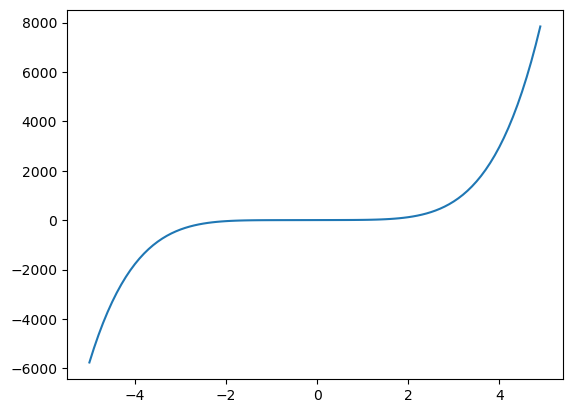

In [12]:
x_array = np.arange(-5, 5, 0.1)
plt.plot(x_array, 2.3 * x_array**5 + 2.3 * x_array**4 + 3.2 * x_array + 3.2)

# 3. Método más eficiente

Programa una función que, dada una función $f$ con una raiz $p$ cerca de un valor $p_0$, encuentra una raiz de "la forma más eficiente" (vista hasta ahora). Esto es:

1. Comprueba si el método de la secante garantizaría la convergencia a $p$ dadas dos estimaciones $p_0$ y $p_1$.
2. Si es así, aplica el método de la secante para encontrar $p$.
3. Si la convergencia no está garantizada, encuentra un intervalo $[a, b]$ cerca de $p_0$ donde haya un cambio de signo. 
4. Utiliza el método Regula-Falsi para encontrar la raiz $p$ en $[a, b]$. 

In [16]:
def find_root_efficiently(f, p_0, p_1):
    if continuous_domain(diff(diff(f,x),x),x,Interval(p_0,p_1)):
        p = secant2(f,p_0,p_1)
    else:
        p = regula_falsi(f,p_0,p_1)
    return p

Utiliza la función anterior para encontrar una raíz de las siguientes funciones:

**Lista de funciones**:

1. $f_1(x)=2.3 x^5 + 2.3 x^4 + 3.2 x + 3.2$
2. $f_4(x)=e^{-x} - \ln x$, for $x > 0$
3. $f_5(x)=\ln x + x$, for $x > 0$
4. $f_8(x)=\ln x + \sqrt{x}$, for $x > 0$
5. $f_7(x)=(x-1)^2 - \sqrt{x}$, for $x > 0$
6. $f_9(x)=e^x - \sin x$, for $x > 0$

In [17]:
import matplotlib.pyplot as pyplot
import math as mat

x = Symbol('x')

def f1(x):
    x = Symbol('x')
    return 2.3*(x**5) + 2.3*(x**4) + 3.2*x + 3.2

def f2(x):
    return ((mat.e)**(-x)) - mat.log(x)

def f3(x):
    return (mat.log(x)) + x

def f4(x):
    return (mat.log(x)) + (mat.sqrt(x))

def f5(x):
    return ((x-1)**2) - (mat.sqrt(x))

def f6(x):
    return ((mat.e)**x) - (mat.sin(x))

In [18]:
fd1 = find_root_efficiently(f1,-2,2)
print(fd1)

fd2 = find_root_efficiently(f2,1,2)
print(fd2)

fd3 = find_root_efficiently(f3,0.1,1)
print(fd3)

fd4 = find_root_efficiently(f4,0.1,1)
print(fd4)

fd5 = find_root_efficiently(f5,1.5,2.5)
print(fd5)

fd6 = find_root_efficiently(f6,0.1,2)
print(fd6)

C:\Users\ilarr\anaconda3\lib\site-packages\sympy\core\function.py:1247: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function f1 at 0x00000235EBCC8940>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  expr = sympify(expr)


SympifyError: Sympify of expression 'could not parse '<function f1 at 0x00000235EBCC8940>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)